In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [4]:
from sklearn.datasets import load_digits

In [5]:
digits=load_digits()

In [6]:
type(digits)

sklearn.utils.Bunch

In [13]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [27]:
digits.data.shape

(1797, 64)

In [17]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [18]:
plt.gray()

<Figure size 432x288 with 0 Axes>

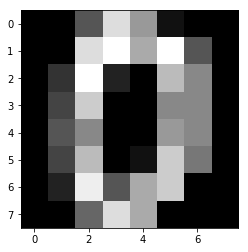

In [28]:
plt.imshow(digits.images[0])
plt.show()

In [21]:
digits['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
digits['images'][:5]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]],

       [[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
        [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
        [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0

In [24]:
digits["target"]

array([0, 1, 2, ..., 8, 9, 8])

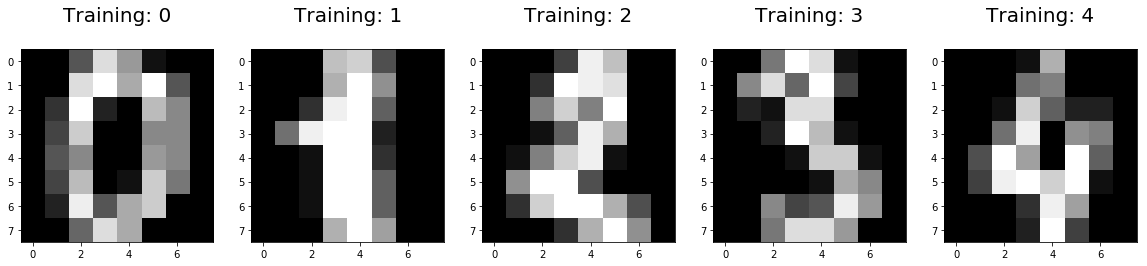

In [25]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)


In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(digits.data,digits.target,random_state=0,test_size=0.3)


In [105]:
clf=dt.fit(X_train,Y_train)

In [52]:
dt.score(X_test,Y_test)

0.8592592592592593

array([2])

In [53]:
X_test[0].reshape(1,-1).shape

(1, 64)

In [54]:
X_test[0].shape

(64,)

In [55]:
type(X_test)

numpy.ndarray

In [58]:
X_test[0].reshape(1,-1).ndim

2

In [60]:
prediction=dt.predict(X_test[0].reshape(1,-1))

In [61]:
digits.target[prediction]

array([2])

In [72]:
dt.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
prediction=knn.predict(X_test)

In [91]:
knn.score(X_test,Y_test)

0.9814814814814815

In [92]:
knn.score(X_train,Y_train)

0.9912490055688147

In [97]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [98]:
lr.score(X_train,Y_train)

0.9976133651551312

In [99]:
lr.score(X_test,Y_test)

0.9537037037037037

In [100]:
import graphviz

In [112]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'


In [113]:
dot_data =tree.export_graphviz(clf, out_file=None) 

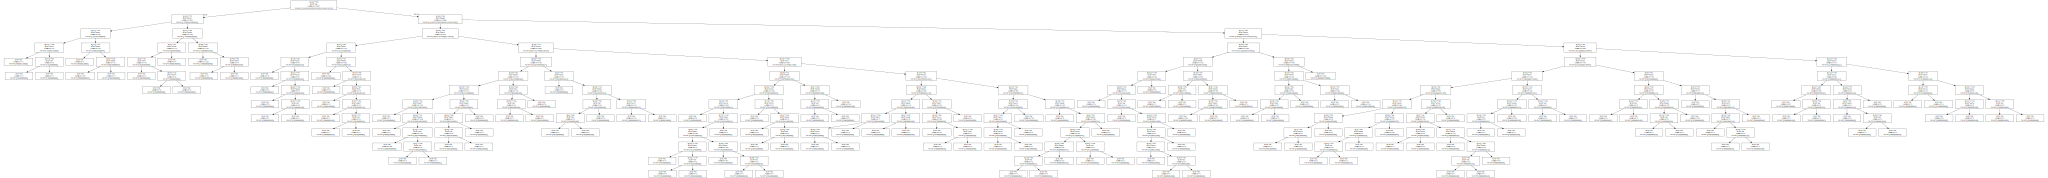

In [115]:
graph=graphviz.Source(dot_data)
graph

In [117]:
print(clf.tree_.max_depth)

12


In [118]:
help(clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The maximal depth of the tree.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leaves, children_left[i] == TREE_LE

In [120]:
print(clf.tree_.impurity)

[0.89979108 0.54067969 0.42247934 0.27218935 0.         0.5
 0.         0.         0.09183673 0.         0.04759072 0.
 0.         0.22809157 0.73469388 0.64       0.         0.44444444
 0.         0.         0.         0.05911387 0.         0.375
 0.         0.         0.88809975 0.81428221 0.20363636 0.78125
 0.         0.72222222 0.         0.625      0.         0.5
 0.         0.         0.09496348 0.         0.77777778 0.
 0.75       0.         0.66666667 0.         0.5        0.
 0.         0.78422192 0.46557706 0.28263097 0.16930444 0.05712131
 0.         0.03863899 0.         0.01960592 0.         0.5
 0.         0.         0.5625     0.66666667 0.5        0.
 0.         0.         0.         0.34       0.5        0.
 0.         0.         0.63100137 0.         0.49586777 0.5
 0.5        0.         0.         0.         0.1171875  0.
 0.         0.72019258 0.36536968 0.19609977 0.11631466 0.
 0.0803486  0.06119792 0.66666667 0.         0.5        0.
 0.         0.02127414 0.   